In [1]:
#importing dictionaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
#importing the data using pandas
Df=pd.read_csv(r"C:\Users\user\Downloads\Mall_Customers.csv")
Df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Conducting descriptive statistics analysis
Df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

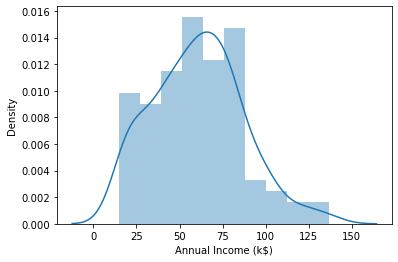

In [4]:
sns.distplot(Df['Annual Income (k$)'])

In [5]:
Df1 =Df.drop(['CustomerID', 'Gender'],1)
columns =Df1.columns

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

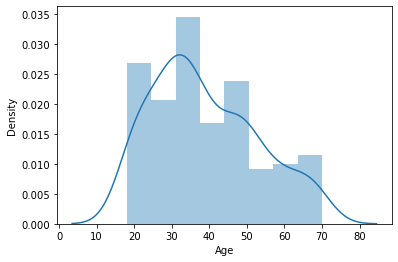

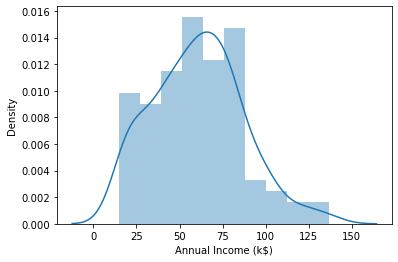

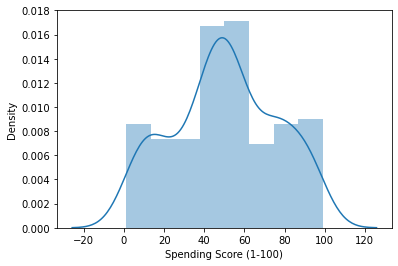

In [6]:
# Viewing the data to see if there are any outliers 
for i in columns:
    plt.figure()
    sns.distplot(Df1[i])
    

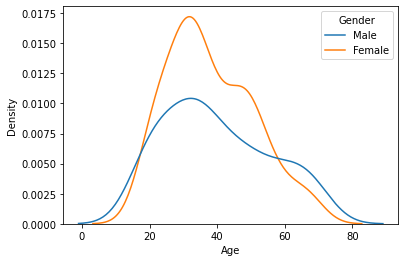

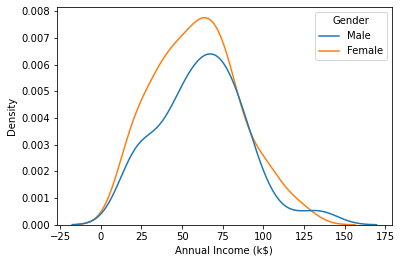

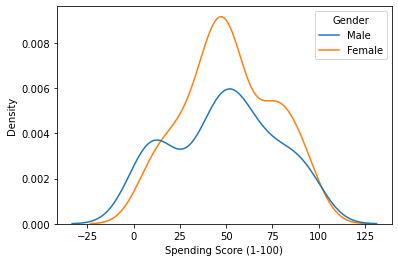

In [7]:
#Digging deeper into investigation of outliers
for i in columns:
    plt.figure()
    sns.kdeplot(Df1[i],hue = Df['Gender'])

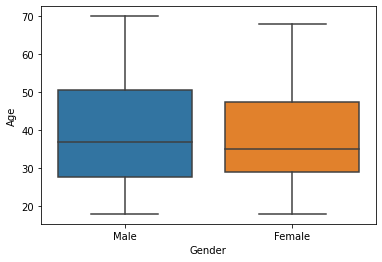

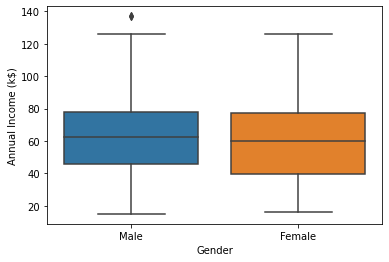

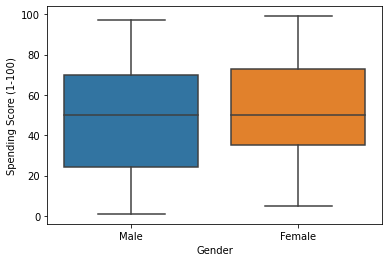

In [8]:
for i in columns:
    plt.figure()
    sns.boxplot(data=Df,x='Gender',y=Df[i])

In [9]:
#Propotionality of gender distribution of the data 
Df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

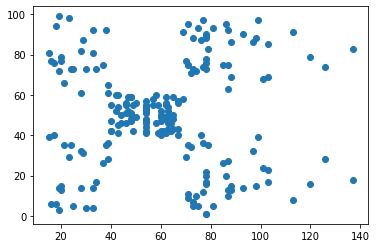

In [10]:
#2D map for annual income against spending score
plt.scatter(Df['Annual Income (k$)'],Df['Spending Score (1-100)'])
plt.show()

In [11]:
Df1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

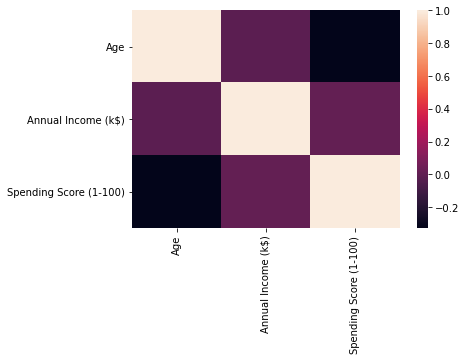

In [12]:
sns.heatmap(Df1.corr(),)

In [13]:
from sklearn.cluster import KMeans
clustering1 = KMeans(n_clusters =3)

In [14]:
#Generate univeriate cluster based on Annual income
clustering1.fit(Df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [15]:
Df['Income cluster'] = clustering1.labels_

In [16]:
Df['Income cluster'].value_counts()

2    92
0    72
1    36
Name: Income cluster, dtype: int64

In [17]:
clustering1.inertia_

23528.152173913048

In [18]:
i_range= range(1,11)
sse=[]
for i in  i_range:
    clustering = KMeans(n_clusters = i)
    clustering.fit(Df[['Annual Income (k$)']])
    sse.append(clustering.inertia_)
    

In [19]:
sse

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2827.308424908427,
 2173.287445887446,
 1734.167748917749]

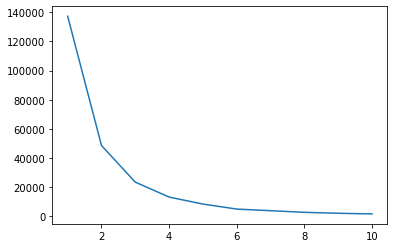

In [20]:
plt.plot(i_range,sse)
plt.show()

In [21]:
Df1.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [22]:
#Understanding how the parameters are distributed based on Annual income 
Df.groupby('Income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-22-e1e0b35b138b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Df.groupby('Income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


In [23]:
#Conducting a bivariate analysis
clustering2 = KMeans(n_clusters =5)
Df2= Df1.drop('Age',1)
ypred = clustering2.fit_predict(Df2)
Df['Income and Spending score']= ypred

In [24]:
Df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income and Spending score
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,3


In [25]:
clustering2.cluster_centers_
cluster= pd.DataFrame(clustering2.cluster_centers_)
cluster

,0,1
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


No handles with labels found to put in legend.


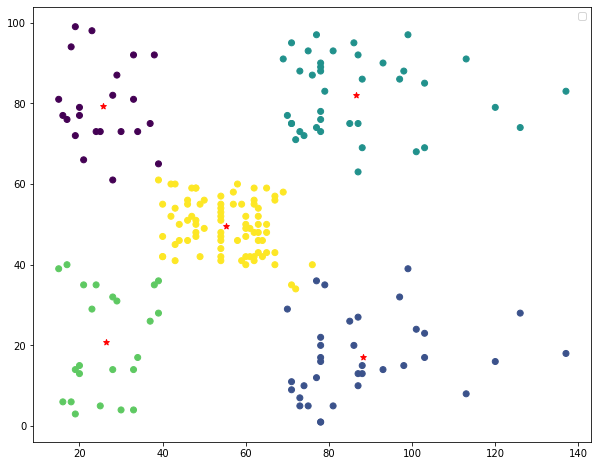

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1], c = 'red',marker ='*')
plt.scatter(Df['Annual Income (k$)'],Df['Spending Score (1-100)'], c = ypred)
plt.legend()
plt.show()

In [27]:
pd.crosstab(Df['Income and Spending score'],Df['Gender'],normalize = True )

Gender,Female,Male
Income and Spending score,,
0,0.065,0.045
1,0.080,0.095
2,0.105,0.090
3,0.070,0.045
4,0.240,0.165


In [28]:
Df.groupby('Income and Spending score')['Annual Income (k$)','Spending Score (1-100)'].mean()

<ipython-input-28-2b7112375c63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Df.groupby('Income and Spending score')['Annual Income (k$)','Spending Score (1-100)'].mean()


,Annual Income (k$),Spending Score (1-100)
Income and Spending score,,
0,25.727273,79.363636
1,88.200000,17.114286
2,86.538462,82.128205
3,26.304348,20.913043
4,55.296296,49.518519


In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [30]:
Df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income and Spending score
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,0


In [31]:
Dff = pd.get_dummies(Df,drop_first= True)
Dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Income and Spending score,Gender_Male
0,1,19,15,39,0,3,1
1,2,21,15,81,0,0,1
2,3,20,16,6,0,3,0
3,4,23,16,77,0,0,0
4,5,31,17,40,0,3,0


In [32]:
Dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Income and Spending score', 'Gender_Male'],
      dtype='object')

In [33]:
Dff=Dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
Dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [34]:
k_range = range(1,10)
sse=[]
for i in k_range:
    KMmodel= KMeans(n_clusters =i)
    y1pred=KMmodel.fit_predict(Dff)
    sse.append(KMmodel.inertia_)

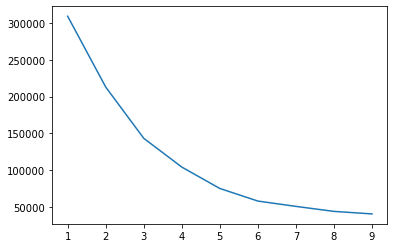

In [35]:
plt.plot(k_range,sse)
plt.show()